In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn.metrics import pairwise_distances, silhouette_samples, silhouette_score

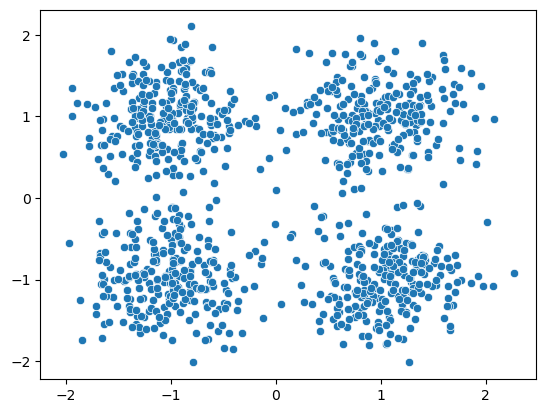

In [2]:
n = 1000
blob_centers= ([1, 1], [-1, 1], [1,-1], [-1,-1])
X, y = make_blobs(n_samples=n, centers=blob_centers, cluster_std=0.4, random_state=0)
sns.scatterplot(x=X[:,0], y=X[:,1])
plt.show()

/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

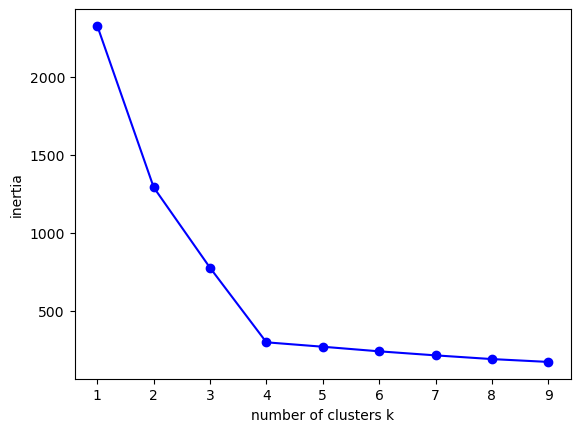

In [3]:
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,10), inertia, 'bo-')
plt.xlabel('number of clusters k')
plt.ylabel('inertia')
plt.show()

/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


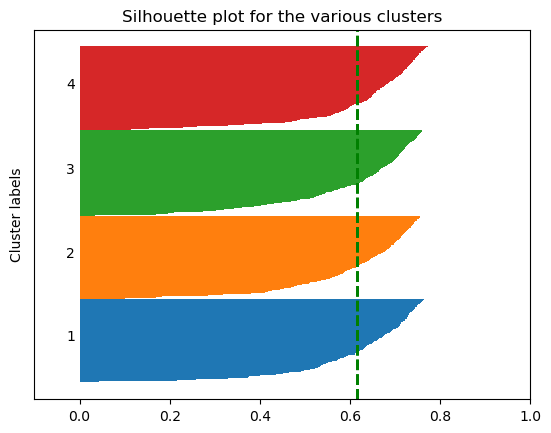

In [4]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
y_predict = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
silhouette_vals = silhouette_samples(X,y_predict)

y_ticks = []
y_lower = y_upper = 0
for i,cluster in enumerate(np.unique(y_predict)):
   cluster_silhouette_vals = silhouette_vals[y_predict == cluster]
   cluster_silhouette_vals.sort()
   y_upper += len(cluster_silhouette_vals)
   
   plt.barh(range(y_lower,y_upper),
   cluster_silhouette_vals,height =1);
   plt.text(-0.03,(y_lower+y_upper)/2,str(i+1))
   y_lower += len(cluster_silhouette_vals)
       
   # Get the average silhouette score 
   avg_score = np.mean(silhouette_vals)
   plt.axvline(avg_score,linestyle ='--',
   linewidth =2,color = 'green')
   plt.yticks([])
   plt.xlim([-0.1, 1])
   #plt.set_xlabel('Silhouette coefficient values')
   plt.ylabel('Cluster labels')
   plt.title('Silhouette plot for the various clusters');



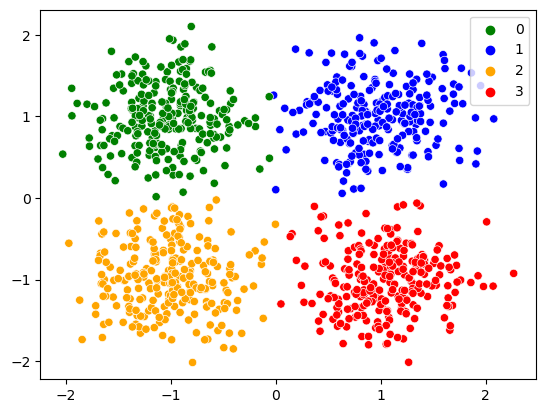

In [5]:
sns.scatterplot(x=X[:,0],y=X[:,1], hue=y_predict, palette=['green','blue','orange','red'])
plt.show()

/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/adikondepudi/miniforge3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

0.4412135334850184
0.4859111516730415
0.6147821354793205
0.5295391424535858
0.453229384067647
0.38637416335684666
0.3316909475120981
0.3374385718712613


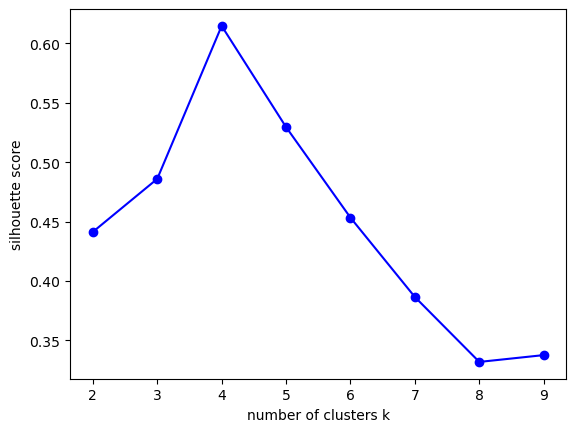

In [6]:
silhoue = []
for k in range(2,10):
    model = KMeans(n_clusters=k, random_state=0).fit(X)
    score = metrics.silhouette_score(X, model.labels_, metric='euclidean')
    print(score)
    silhoue.append(score)
    
plt.plot(range(2,10), silhoue, 'bo-')
plt.xlabel('number of clusters k')
plt.ylabel('silhouette score')
plt.show()

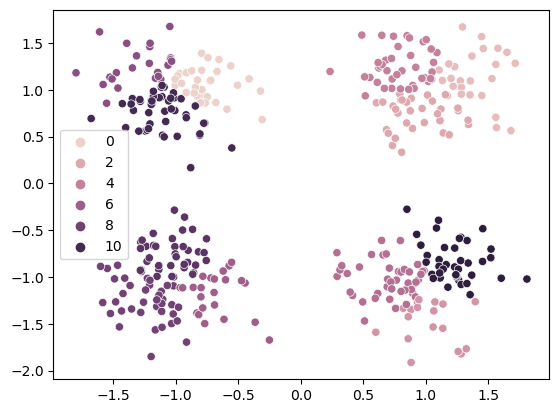

In [7]:
from sklearn.cluster import AffinityPropagation
n = 400
blob_centers= ([1, 1], [-1, 1], [1,-1], [-1,-1])
X, y = make_blobs(n_samples=n, centers=blob_centers, cluster_std=0.3, random_state=0)
AP = AffinityPropagation(random_state=0).fit(X)
y_predict = AP.fit_predict(X)
sns.scatterplot(x=X[:,0],y=X[:,1], hue=y_predict)
plt.show()